# DEMetropolis(Z): tune_drop_fraction
The implementation of `DEMetropolisZ` in PyMC uses a different tuning scheme than described by [ter Braak & Vrugt, 2008](https://doi.org/10.1007/s11222-008-9104-9).
In our tuning scheme, the first `tune_drop_fraction * 100` % of the history from the tuning phase is dropped when the tune iterations end and sampling begins.

In this notebook, a D-dimenstional multivariate normal target densities is sampled with `DEMetropolisZ` at different `tune_drop_fraction` settings to show why the setting was introduced.

In [1]:
import time

import arviz as az
import ipywidgets
import numpy as np
import pandas as pd
import pymc as pm

from matplotlib import cm, gridspec
from matplotlib import pyplot as plt

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v3.9.0


In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

## Setting up the Benchmark
We use a multivariate normal target density with some correlation in the first few dimensions.

In [3]:
def get_mvnormal_model(D: int) -> pm.Model:
    true_mu = np.zeros(D)
    true_cov = np.eye(D)
    true_cov[:5, :5] = np.array(
        [
            [1, 0.5, 0, 0, 0],
            [0.5, 2, 2, 0, 0],
            [0, 2, 3, 0, 0],
            [0, 0, 0, 4, 4],
            [0, 0, 0, 4, 5],
        ]
    )

    with pm.Model() as pmodel:
        x = pm.MvNormal("x", mu=true_mu, cov=true_cov, shape=(D,))

    true_samples = x.random(size=1000)
    truth_id = az.data.convert_to_inference_data(true_samples[np.newaxis, :], group="random")
    return pmodel, truth_id

The problem will be 10-dimensional and we run 5 independent repetitions.

In [4]:
D = 10
N_tune = 10000
N_draws = 10000
N_runs = 5
pmodel, truth_id = get_mvnormal_model(D)
pmodel.logp(pmodel.test_point)

C:\Users\osthege\AppData\Local\Continuum\miniconda3\envs\pm3-dev2\lib\site-packages\arviz\data\inference_data.py:99: UserWarning: random group is not defined in the InferenceData scheme
  "{} group is not defined in the InferenceData scheme".format(key), UserWarning


array(-9.99410429)

In [5]:
df_results = pd.DataFrame(columns="drop_fraction,r,ess,t,idata".split(",")).set_index(
    "drop_fraction,r".split(",")
)

for drop_fraction in (0, 0.5, 0.9, 1):
    for r in range(N_runs):
        with pmodel:
            t_start = time.time()
            step = pm.DEMetropolisZ(tune="lambda", tune_drop_fraction=drop_fraction)
            idata = pm.sample(
                cores=6,
                tune=N_tune,
                draws=N_draws,
                chains=1,
                step=step,
                start={"x": [7.0] * D},
                discard_tuned_samples=False,
                ,
                # the replicates (r) have different seeds, but they are comparable across
                # the drop_fractions. The tuning will be identical, they'll divergen in sampling.
                random_seed=2020 + r,
            )
            t = time.time() - t_start
            df_results.loc[(drop_fraction, r), "ess"] = float(az.ess(idata).x.mean())
            df_results.loc[(drop_fraction, r), "t"] = t
            df_results.loc[(drop_fraction, r), "idata"] = idata

Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 14 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 14 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
DEMetropolisZ: [x]


Sampling 1 chain for 10_000 tune and 10_000 draw iterations (10_000 + 10_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [6]:
df_results[["ess", "t"]]

ess        t
drop_fraction r                  
0.0           0  140.821  13.7433
              1  169.738  13.3275
              2  135.699  13.4845
              3  36.0414  13.4925
              4  162.813  13.5305
0.5           0  175.696  13.6246
              1  250.488  13.4693
              2  146.164  13.2033
              3  138.985  13.3416
              4  195.166  13.1879
0.9           0  184.452  13.2946
              1  253.175  13.4086
              2  146.507  13.2149
              3  139.975  12.9458
              4  185.976  13.2692
1.0           0  36.5176  13.2006
              1  46.5248  13.2827
              2   30.509  13.3686
              3  38.1524  13.0076
              4  21.3232  13.3147

## Visualizing the Effective Sample Sizes
Here, the mean effective sample size is plotted with standard errors. Next to it, the traces of all chains in one dimension are shown to better understand why the effective sample sizes are so different.

In [7]:
df_temp = df_results.ess.unstack("r").T

fig = plt.figure(dpi=100, figsize=(12, 8))
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 2])
ax_left = plt.subplot(gs[:, 0])
ax_right_bottom = plt.subplot(gs[3, 1])
axs_right = [
    plt.subplot(gs[0, 1], sharex=ax_right_bottom),
    plt.subplot(gs[1, 1], sharex=ax_right_bottom),
    plt.subplot(gs[2, 1], sharex=ax_right_bottom),
    ax_right_bottom,
]
for ax in axs_right[:-1]:
    plt.setp(ax.get_xticklabels(), visible=False)

ax_left.bar(
    x=df_temp.columns,
    height=df_temp.mean() / N_draws * 100,
    width=0.05,
    yerr=df_temp.sem() / N_draws * 100,
)
ax_left.set_xlabel("tune_drop_fraction")
ax_left.set_ylabel("$S_{eff}$   [%]")

# traceplots
for ax, drop_fraction in zip(axs_right, df_temp.columns):
    ax.set_ylabel("$f_{drop}$=" + f"{drop_fraction}")
    for r, idata in enumerate(df_results.loc[(drop_fraction)].idata):
        # combine warmup and draw iterations into one array:
        samples = np.vstack(
            [idata.warmup_posterior.x.sel(chain=0).values, idata.posterior.x.sel(chain=0).values]
        )
        ax.plot(samples, linewidth=0.25)
    ax.axvline(N_tune, linestyle="--", linewidth=0.5, label="end of tuning")
axs_right[0].legend()

axs_right[0].set_title(f"1-dim traces of {N_runs} independent runs")
ax_left.set_title("mean $S_{eff}$ on " + f"{D}-dimensional correlated MVNormal")
ax_right_bottom.set_xlabel("iteration")
plt.show()

C:\Users\osthege\AppData\Local\Continuum\miniconda3\envs\pm3-dev2\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


## Autocorrelation
A diagnostic measure for the effect we can see above is the autocorrelation in the sampling phase.

When the entire tuning history is dropped, the chain has to diverge from its current position back into the typical set, but without the lambda-swing-in trick, it takes much longer.

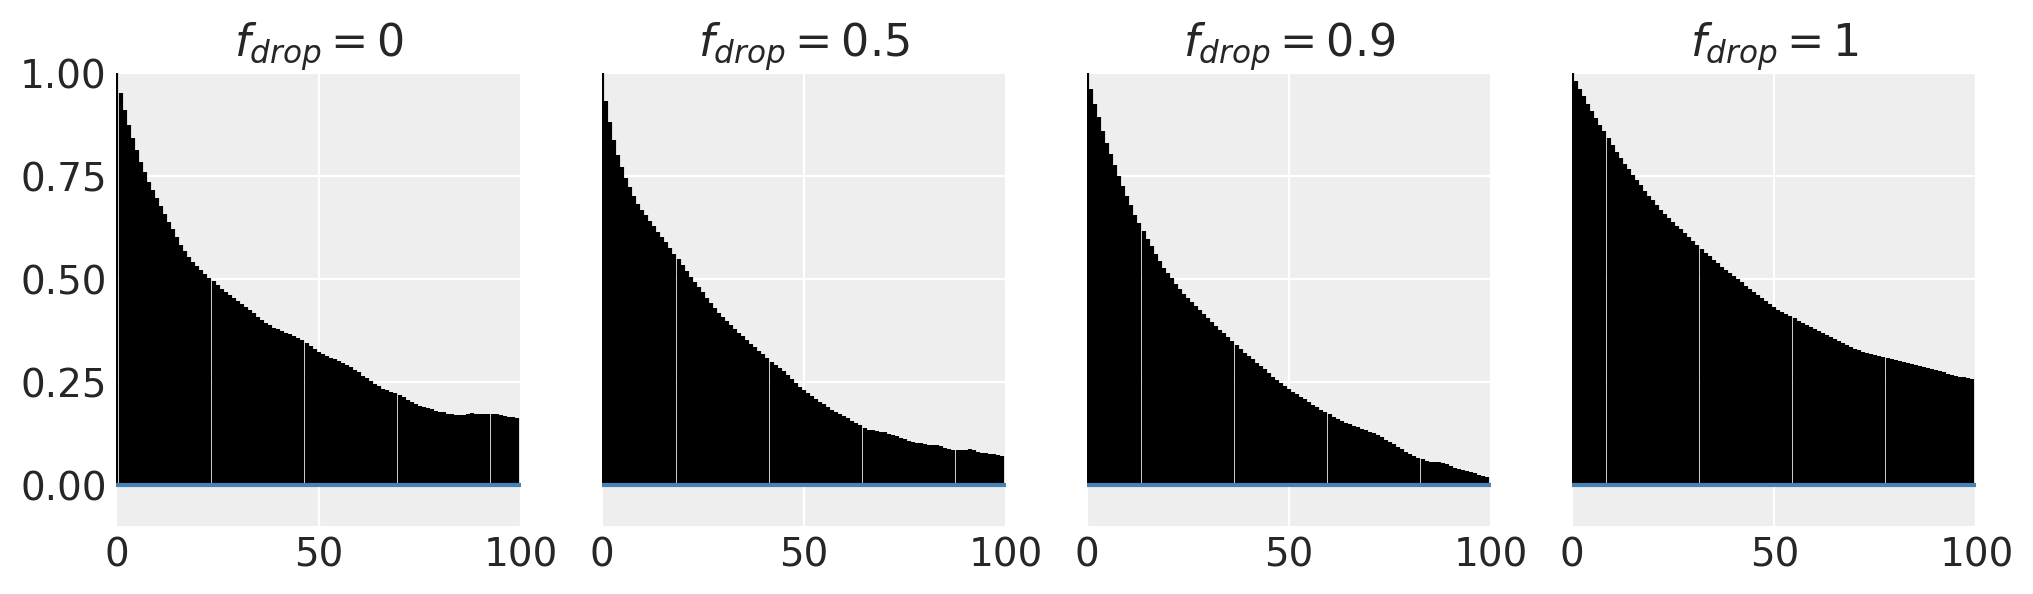

In [8]:
fig, axs = plt.subplots(ncols=4, figsize=(12, 3), sharey="row")
for ax, drop_fraction in zip(axs, (0, 0.5, 0.9, 1)):
    az.plot_autocorr(df_results.loc[(drop_fraction, 0), "idata"].posterior.x.T, ax=ax)
    ax.set_title("$f_{drop}=$" + f"{drop_fraction}")
ax.set_ylim(-0.1, 1)
ax.set_ylim()
plt.show()

## Acceptance Rate
The rolling mean over the `'accepted'` sampler stat shows that by dropping the tuning history, the acceptance rate shoots up to almost 100 %. High acceptance rates happen when the proposals are too narrow, as we can see up in the traceplot.

In [9]:
fig, ax = plt.subplots(ncols=1, figsize=(12, 7), sharey="row")

for drop_fraction in df_temp.columns:
    # combine warmup and draw iterations into one array:
    idata = df_results.loc[(drop_fraction, 0), "idata"]
    S = np.hstack(
        [
            idata.warmup_sample_stats["accepted"].sel(chain=0),
            idata.sample_stats["accepted"].sel(chain=0),
        ]
    )
    for c in range(idata.posterior.dims["chain"]):
        ax.plot(
            pd.Series(S).rolling(window=500).mean().iloc[500 - 1 :].values,
            label="$f_{drop}$=" + f"{drop_fraction}",
        )
ax.set_xlabel("iteration")
ax.legend()
ax.set_ylabel("rolling mean acceptance rate (w=500)")
plt.ylim(0, 1)
plt.show()

## Inspecting the Sampler Stats
With the following widget, you can explore the sampler stats to better understand the tuning phase.

Check out the `lambda` and rolling mean of `accepted` sampler stats to see how their interaction improves initial convergece.

In [10]:
def plot_stat(*, sname: str = "accepted", rolling=True):
    fig, ax = plt.subplots(ncols=1, figsize=(12, 7), sharey="row")
    f_drop_to_color = {
        1: "blue",
        0.9: "green",
        0.5: "orange",
        0: "red",
    }
    for row in df_results.reset_index().itertuples():
        idata = row.idata
        S = np.hstack(
            [idata.warmup_sample_stats[sname].sel(chain=0), idata.sample_stats[sname].sel(chain=0)]
        )
        for c in range(row.idata.posterior.dims["chain"]):
            y = pd.Series(S).rolling(window=500).mean().iloc[500 - 1 :].values if rolling else S
            ax.plot(y, color=f_drop_to_color[row.drop_fraction], linewidth=0.5)
    for f_drop, color in f_drop_to_color.items():
        ax.plot([], [], label="$f_{drop}=$" + f"{f_drop}", color=color)
    ax.set_xlabel("iteration")
    ax.legend()
    ax.set_ylabel(sname)
    return


ipywidgets.interact_manual(
    plot_stat, sname=df_results.idata[0, 0].sample_stats.keys(), rolling=True
);

interactive(children=(Dropdown(description='sname', index=2, options=('scaling', 'lambda', 'accepted', 'accept…

In [11]:
%load_ext watermark
%watermark -n -u -v -iv -w

arviz      0.8.3
ipywidgets 7.5.1
pymc      3.9.0
numpy      1.18.1
pandas     1.0.3
last updated: Fri Jun 12 2020 

CPython 3.6.10
IPython 7.13.0
watermark 2.0.2
